# 

In [1]:
import streamlit as st
import pandas as pd
import altair as alt
import plotly.express as px

In [19]:
df_reshaped = pd.read_csv('us-population-2010-2019-reshaped.csv')

In [21]:
df_reshaped

,Unnamed: 0,states,states_code,id,year,population
0,0,Alabama,AL,1,2010,4785437
1,1,Alaska,AK,2,2010,713910
2,2,Arizona,AZ,4,2010,6407172
3,3,Arkansas,AR,5,2010,2921964
4,4,California,CA,6,2010,37319502
...,...,...,...,...,...,...
515,515,Washington,WA,53,2019,7614893
516,516,West Virginia,WV,54,2019,1792147
517,517,Wisconsin,WI,55,2019,5822434
518,518,Wyoming,WY,56,2019,578759


In [4]:
    def make_heatmap(input_df, input_y, input_x, input_color, input_color_theme):
        heatmap = alt.Chart(input_df).mark_rect().encode(
            y=alt.Y(f'{input_y}:O', axis=alt.Axis(title="Year", titleFontSize=18, titlePadding=15, titleFontWeight=900, labelAngle=0)),
            x=alt.X(f'{input_x}:O', axis=alt.Axis(title="", titleFontSize=18, titlePadding=15, titleFontWeight=900)),
            color=alt.Color(f'max({input_color}):Q',
                             legend=None,
                             scale=alt.Scale(scheme=input_color_theme)),
            stroke=alt.value('black'),
            strokeWidth=alt.value(0.25),
        ).properties(width=900
        ).configure_axis(
        labelFontSize=12,
        titleFontSize=12
        ) 
        # height=300
        return heatmap

In [7]:
    heatmap = make_heatmap(df_reshaped, 'year', 'states', 'population', 'blues')
    heatmap

alt.Chart(...)

In [32]:
#import data for Nepal
import geopandas as gpd

#read in once
df_nepaldistricts = gpd.read_file('nepal-with-districts.geojson')
df_nepaldistricts.DISTRICT

0          JHAPA
1           ILAM
2      PANCHTHAR
3      TAPLEJUNG
4         MORANG
         ...    
72        BAJURA
73    KANCHANPUR
74    DADELDHURA
75       BAITADI
76      DARCHULA
Name: DISTRICT, Length: 77, dtype: object

In [35]:
import random
for i in df_nepaldistricts.DISTRICT:
    print(i,',',random.randint(0,5))

JHAPA , 5
ILAM , 5
PANCHTHAR , 2
TAPLEJUNG , 5
MORANG , 5
SUNSARI , 5
BHOJPUR , 5
DHANKUTA , 4
TEHRATHUM , 3
SANKHUWASABHA , 2
SAPTARI , 5
SIRAHA , 5
UDAYAPUR , 1
KHOTANG , 1
OKHALDHUNGA , 4
SOLUKHUMBU , 0
DHANUSA , 2
MAHOTTARI , 4
SARLAHI , 5
SINDHULI , 3
RAMECHHAP , 4
DOLAKHA , 2
BHAKTAPUR , 1
DHADING , 0
KATHMANDU , 1
KAVREPALANCHOWK , 4
LALITPUR , 1
NUWAKOT , 1
RASUWA , 4
SINDHUPALCHOK , 2
BARA , 0
PARSA , 0
RAUTAHAT , 0
CHITWAN , 5
MAKWANPUR , 4
GORKHA , 1
KASKI , 5
LAMJUNG , 2
SYANGJA , 2
TANAHU , 5
MANANG , 1
KAPILVASTU , 0
NAWALPUR , 4
PARASI , 5
RUPANDEHI , 2
ARGHAKHANCHI , 2
GULMI , 5
PALPA , 4
BAGLUNG , 4
MYAGDI , 1
PARBAT , 5
MUSTANG , 2
DANG , 0
PYUTHAN , 3
ROLPA , 4
EASTERN RUKUM , 1
WESTERN RUKUM , 2
SALYAN , 4
DOLPA , 3
HUMLA , 4
JUMLA , 2
KALIKOT , 3
MUGU , 2
BANKE , 1
BARDIYA , 0
SURKHET , 5
DAILEKH , 4
JAJARKOT , 0
KAILALI , 0
ACHHAM , 1
DOTI , 3
BAJHANG , 4
BAJURA , 3
KANCHANPUR , 4
DADELDHURA , 4
BAITADI , 0
DARCHULA , 0


In [27]:
#define cholropleth map  for Nepal  
def make_choropleth(input_df, input_id, input_column, input_color_theme):
    choropleth = px.choropleth(input_df, locations=input_id, color=input_column, locationmode=None,
                               color_continuous_scale=input_color_theme,
                               range_color=(0, max(df_selected_year.population)),
                               scope=None,
                               labels={'population':'Population'}
                              )
    choropleth.update_layout(
        template='plotly_dark',
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        margin=dict(l=0, r=0, t=0, b=0),
        height=350
    )
    return choropleth

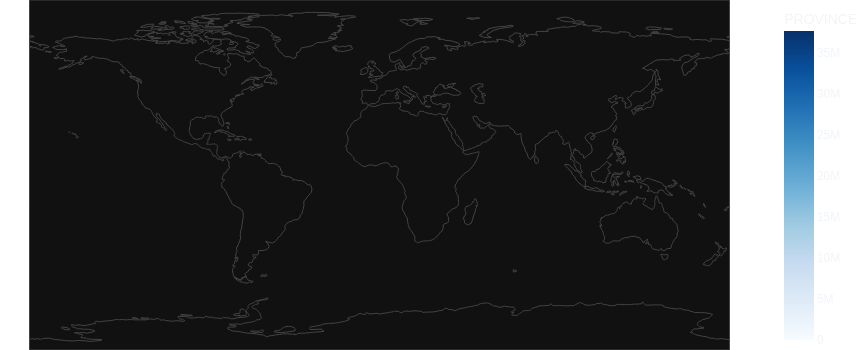

In [28]:
df_selected_year = df_reshaped[df_reshaped.year == 2011]
choropleth = make_choropleth(df_nepaldistricts, 'DISTRICT', 'PROVINCE', 'blues')
choropleth

In [25]:
#define cholropleth map 
def make_choropleth(input_df, input_id, input_column, input_color_theme):
    choropleth = px.choropleth(input_df, locations=input_id, color=input_column, locationmode="USA-states",
                               color_continuous_scale=input_color_theme,
                               range_color=(0, max(df_selected_year.population)),
                               scope="usa",
                               labels={'population':'Population'}
                              )
    choropleth.update_layout(
        template='plotly_dark',
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        margin=dict(l=0, r=0, t=0, b=0),
        height=350
    )
    return choropleth

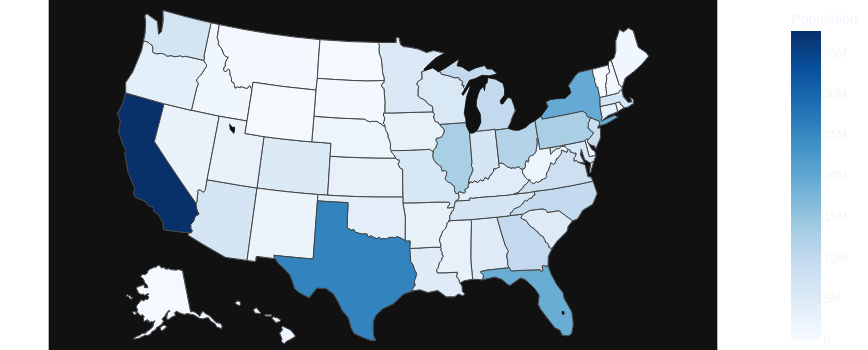

In [26]:
df_selected_year = df_reshaped[df_reshaped.year == 2011]
choropleth = make_choropleth(df_selected_year, 'states_code', 'population', 'blues')
choropleth